### 상관 분석 (Correlation Analysis)
- 두 변수 간의 선형적인 관계가 얼마나 강한지를 확인하는 분석이다.

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프 기본설정\n",
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 생성 (가상의 공부 시간과 성적 데이터)
# 독립변수 (X) : 공부시간
# np.random.rand(개수) : 0 ~ 1 사이의 난수를 "개수"만큼 생성한다.
# 0 ~ 10시간 사이의 분포로 되어 있는 공부 시간
np.random.seed(1)
study_hours = np.random.rand(50) * 10
study_hours

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])

In [3]:
# 종속 변수 (Y) : 시험 점수
# 공부 1시간당 3점씩 오른다는 규칙을 부여한다. (3 * study_hours)
# 공부를 안해도 기본 50점은 부여한다. ( + 50)
# 모든 사람들이 동일하게 오르지는 않기 때문에 랜덤성을 부여한다.
exam_scores = 3 * study_hours + np.random.normal(0, 5, 50) + 50
exam_scores

array([59.07479664, 67.3837066 , 46.64720059, 59.00665418, 48.81612498,
       53.94223633, 63.88681723, 64.07704261, 60.94384647, 61.7263572 ,
       58.84004396, 79.01885802, 56.38760627, 73.15854486, 51.77620522,
       80.61530099, 63.11993883, 69.8467104 , 55.71245976, 54.18179544,
       68.30974607, 77.30113366, 58.35825418, 73.70279443, 80.48659164,
       81.49371031, 53.97926297, 55.59734932, 51.32292288, 82.60861588,
       55.51505412, 61.14276457, 81.17927664, 65.61709998, 76.41446036,
       67.06455301, 81.52290486, 68.05628848, 43.32807929, 69.98200013,
       80.46601801, 76.82581424, 59.9914945 , 63.56737377, 51.56576013,
       67.576679  , 78.40833877, 62.61848035, 57.52161944, 52.89706682])

In [4]:
# 상관 관계 분석 (피어슨 상관 계수)
# stats.pearsonr(X, Y)
# 귀무 가설 : 두 변수는 상관관계가 없다 (혹은 상관 관계가 유의미 하지 않다) (r = 0가 가까운값)
# 대립 가설 : 두 변수는 상관관계가 있다 (혹은 상관 관계가 유의미 하다) (r = 0과 가깝지 않은값)
# r : 피어슨 상관 계수. 두 변수가 양의 관계를 가지면 양수가 나오고 음의 관계를 가지면 음수가 나온다.
# 첫 번째 반환값 : r (corr), 피어슨 상관계수
# 두 번째 반환값 : p value
corr, p_val = stats.pearsonr(study_hours, exam_scores)
print(f'피어슨 상관 계수 : {corr}')
print(f'p value : {p_val}')

피어슨 상관 계수 : 0.9041685073367425
p value : 2.3443198866381833e-19


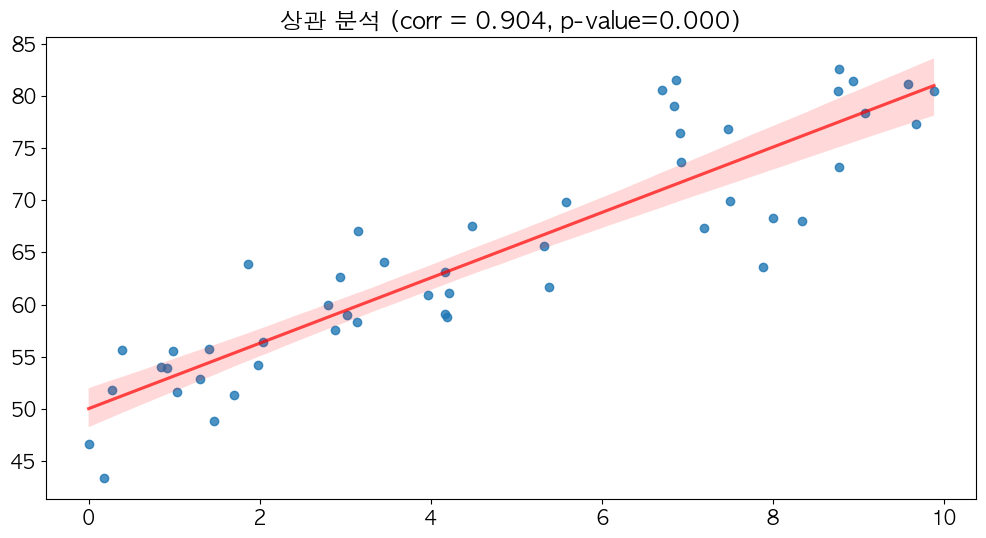

In [6]:
# regplot (regression plot) : 회귀 플롯
# 회귀선 : 데이터의 중심을 관통하는 추세선(경향성 파악, 인공지능에서는 예측선)
# 산점도 : 회귀선으로 부터 실제 데이터이 어떻게 퍼져 있는지
# 공간 : 신뢰구간

# line_kws : 회귀선에 대한 색상을 설정. color - 회귀선과 신뢰구간의 색, alpha - 회귀선과 신뢰구간의 투명도
sns.regplot(x=study_hours, y=exam_scores, line_kws={'color':'red', 'alpha':0.7})

plt.title(f'상관 분석 (corr = {corr:.3f}, p-value={p_val:.3f})')
plt.show()

- 상관 관계 분석 결과 p value가 0.05보다 작은 0.0000000000000000 이므로 "공부시간과 성적은 서로 유미의한 상관관계가 없다"라는 귀무가설을 기각한다.
- 피어슨 상관 계수를 살펴보았을 때(또한 시각화를 하였을 때) 양수이므로 양의 상관관계를 보인다(회귀선이 우상향)
- 시각화 하였을 때 회귀선에 대한 신뢰구간이 보이므로 동일한 시간의 공부를 하였다 하더라도 성적은 다를 수 있다.